In [1]:
import gym
from algorithms.rl import RL
from examples.test_env import TestEnv
from algorithms.planner import Planner
from examples.plots import Plots
from examples.blackjack import Blackjack
import pandas as pd
import seaborn as sns
import numpy as np
import os
import pickle

import math

from examples.test_env import TestEnv
import matplotlib.pyplot as plt
from matplotlib.patches import Arrow, Rectangle
import warnings
from matplotlib.colors import LinearSegmentedColormap

In [2]:
class Plotst:
    @staticmethod
    def grid_world_policy_plot(data, label):
        if not math.modf(math.sqrt(len(data)))[0] == 0.0:
            warnings.warn("Grid map expected.  Check data length")
        else:
            data = np.around(np.array(data).reshape((5, 5)), 2)
            df = pd.DataFrame(data=data)
            my_colors = ((0.0, 0.0, 0.0, 1.0), (0.8, 0.0, 0.0, 1.0), (0.0, 0.8, 0.0, 1.0), (0.0, 0.0, 0.8, 1.0))
            cmap = LinearSegmentedColormap.from_list('Custom', my_colors, len(my_colors))
            ax = sns.heatmap(df, cmap=cmap, linewidths=1.0)
            colorbar = ax.collections[0].colorbar
            colorbar.set_ticks([.4, 1.1, 1.9, 2.6])
            colorbar.set_ticklabels(['Left', 'Down', 'Right', 'Up'])
            plt.title(label)
            plt.show()

    @staticmethod
    def grid_values_heat_map(data, label):
        if not math.modf(math.sqrt(len(data)))[0] == 0.0:
            warnings.warn("Grid map expected.  Check data length")
        else:
            data = np.around(np.array(data).reshape((8, 8)), 2)
            df = pd.DataFrame(data=data)
            sns.heatmap(df, annot=True).set_title(label)
            plt.show()

    @staticmethod
    def v_iters_plot(data, label):
        df = pd.DataFrame(data=data)
        df.columns = [label]
        sns.set_theme(style="whitegrid")
        title = label + " v Iterations"
        sns.lineplot(x=df.index, y=label, data=df).set_title(title)
        plt.show()

In [3]:
taxi = gym.make('Taxi-v3', render_mode=None)

In [ ]:
gamma_list = [0.4,0.5,0.6,0.7,0.8,0.9,0.99]
action_list = []
V_list = []
V_change_list = []
for sample_gamma in gamma_list:
    V, V_track, pi = Planner(taxi.env.P).value_iteration(gamma=sample_gamma,n_iters=10000, theta=1e-3)
    action = []
    for i in range(len(V)):
        action.append(pi(i))
    V_track_new = []
    for iteration in V_track:
        if np.sum(iteration) != 0:
            V_track_new.append(iteration)

    V_track_max = [np.max(abs(V_track[min(i+1,len(V_track)-1)]-V_track[i])) for i,x in enumerate(V_track_new)]
    action_list.append(action)
    V_list.append(V)
    V_change_list.append(V_track_max)

In [ ]:
action_list1 = []
V_list1 = []
V_change_list1 = []
for sample_gamma in gamma_list:
    V, V_track, pi = Planner(taxi.env.P).value_iteration(gamma=sample_gamma,n_iters=10000, theta=1e-6)
    action = []
    for i in range(len(V)):
        action.append(pi(i))
    V_track_new = []
    for iteration in V_track:
        if np.sum(iteration) != 0:
            V_track_new.append(iteration)

    V_track_max = [np.max(abs(V_track[min(i+1,len(V_track)-1)]-V_track[i])) for i,x in enumerate(V_track_new)]
    action_list1.append(action)
    V_list1.append(V)
    V_change_list1.append(V_track_max)

In [ ]:
n_iteration_list = []
for i in range(len(V_change_list)):
    n_iteration_list.append(len(V_change_list[i]))

n_iteration_list1 = []
for i in range(len(V_change_list1)):
    n_iteration_list1.append(len(V_change_list1[i]))
    
plt.figure(figsize=(10, 6)) 
plt.plot(gamma_list, n_iteration_list, label = "theta = e-3")
plt.plot(gamma_list, n_iteration_list1, label = "theta = e-6")
plt.legend(loc="upper left")    
plt.title('number of iterations until convergence with change in Gamma')
plt.xlabel('Gamma')
plt.ylabel('number of iterations')
plt.show()

In [ ]:
avg_v_list = []
for i in range(len(V_list)):
    avg_v_list.append(np.mean(V_list[i]))

avg_v_list1 = []
for i in range(len(V_list1)):
    avg_v_list1.append(np.mean(V_list1[i]))
    
plt.figure(figsize=(10, 6)) 
plt.plot(gamma_list, avg_v_list, label = "theta = e-3")
plt.plot(gamma_list, avg_v_list1, label = "theta = e-6")
plt.legend(loc="upper left")    
plt.title('average value after convergence with change in Gamma')
plt.xlabel('Gamma')
plt.ylabel('average value after convergence')
plt.show()

In [ ]:
np.array(n_iteration_list1)/np.array(n_iteration_list)

In [ ]:
gamma_list = [0.4,0.5,0.6,0.7,0.8,0.9,0.99]
action_list1 = []
V_list1 = []
V_change_list1 = []
for sample_gamma in gamma_list:
    V, V_track, pi = Planner(taxi.env.P).policy_iteration(gamma=sample_gamma,n_iters=10000, theta=1e-3)
    action = []
    for i in range(len(V)):
        action.append(pi(i))
    V_track_new = []
    for iteration in V_track:
        if np.sum(iteration) != 0:
            V_track_new.append(iteration)

    V_track_max = [np.max(abs(V_track[min(i+1,len(V_track)-1)]-V_track[i])) for i,x in enumerate(V_track_new)]
    action_list1.append(action)
    V_list1.append(V)
    V_change_list1.append(V_track_max)

In [ ]:
n_iteration_list = []
for i in range(len(V_change_list)):
    n_iteration_list.append(len(V_change_list[i]))

n_iteration_list1 = []
for i in range(len(V_change_list1)):
    n_iteration_list1.append(len(V_change_list1[i]))
    
plt.figure(figsize=(10, 6)) 
plt.plot(gamma_list, n_iteration_list, label = "value iteration")
plt.plot(gamma_list, n_iteration_list1, label = "policy iteration")
plt.legend(loc="upper left")    
plt.title('number of iterations until convergence with change in Gamma')
plt.xlabel('Gamma')
plt.ylabel('number of iterations')
plt.show()

In [ ]:
avg_v_list = []
for i in range(len(V_list)):
    avg_v_list.append(np.mean(V_list[i]))

avg_v_list1 = []
for i in range(len(V_list1)):
    avg_v_list1.append(np.mean(V_list1[i]))
    
plt.figure(figsize=(10, 6)) 
plt.plot(gamma_list, avg_v_list, label = "value iteration")
plt.plot(gamma_list, avg_v_list1, label = "policy iteration")
plt.legend(loc="upper left")    
plt.title('average value after convergence with change in Gamma')
plt.xlabel('Gamma')
plt.ylabel('average value after convergence')
plt.show()

In [ ]:
gamma_list = [0.4,0.5,0.6,0.7,0.8,0.9,0.99]
action_list1 = []
V_list1 = []
V_change_list1 = []
for sample_gamma in gamma_list:

    Q, Vq, piQ, Q_track, pi_track = RL(taxi.env).q_learning(gamma=sample_gamma,
                   init_alpha=0.5,
                   min_alpha=0.01,
                   alpha_decay_ratio=0.5,
                   init_epsilon=1.0,
                   min_epsilon=0.1,
                   epsilon_decay_ratio=0.9)
    action = []
    for i in range(len(Vq)):
        action.append(piQ(i))
    Q_track_new = []
    for iteration in Q_track:
        if np.sum(iteration) != 0:
            Q_track_new.append(iteration)

    V_track_max = [np.max(abs(Q_track_new[min(i+1,len(Q_track_new)-1)]-Q_track_new[i])) for i,x in enumerate(Q_track_new)]
    action_list1.append(action)
    V_list1.append(Vq)
    V_change_list1.append(V_track_max)

In [ ]:
avg_v_list1 = []
for i in range(len(V_list1)):
    avg_v_list1.append(np.mean(V_list1[i]))
    
plt.figure(figsize=(10, 6)) 

plt.plot(gamma_list, avg_v_list1)

plt.title('average value after convergence with change in Gamma')
plt.xlabel('Gamma')
plt.ylabel('average value after convergence')
plt.show()

In [ ]:
alpha_list = [0.2,0.3,0.4,0.5,0.6,0.7,0.8]
action_list1 = []
V_list1 = []
V_change_list1 = []
for sample_alpha in alpha_list:

    Q, Vq, piQ, Q_track, pi_track = RL(taxi.env).q_learning(gamma=0.99,
                   init_alpha=sample_alpha,
                   min_alpha=0.01,
                   alpha_decay_ratio=0.5,
                   init_epsilon=1.0,
                   min_epsilon=0.1,
                   epsilon_decay_ratio=0.9)
    action = []
    for i in range(len(Vq)):
        action.append(piQ(i))
    Q_track_new = []
    for iteration in Q_track:
        if np.sum(iteration) != 0:
            Q_track_new.append(iteration)

    V_track_max = [np.max(abs(Q_track_new[min(i+1,len(Q_track_new)-1)]-Q_track_new[i])) for i,x in enumerate(Q_track_new)]
    action_list1.append(action)
    V_list1.append(Vq)
    V_change_list1.append(V_track_max)

In [ ]:
avg_v_list1 = []
for i in range(len(V_list1)):
    avg_v_list1.append(np.mean(V_list1[i]))
    
plt.figure(figsize=(10, 6)) 

plt.plot(alpha_list, avg_v_list1, label = "10000 episodes")
   
plt.title('average value after convergence with change in Starting Alpha')
plt.xlabel('Starting Alpha')
plt.ylabel('average value after convergence')
plt.show()

In [ ]:
alpha_decay_list = [0.3,0.4,0.5,0.6,0.7,0.8,0.9]
action_list0 = []
V_list0 = []
V_change_list0 = []
for sample_alpha_decay in alpha_decay_list:

    Q, Vq, piQ, Q_track, pi_track = RL(taxi.env).q_learning(gamma=0.99,
                   init_alpha=0.2,
                   min_alpha=0.01,
                   alpha_decay_ratio=sample_alpha_decay,
                   init_epsilon=1.0,
                   min_epsilon=0.1,
                   epsilon_decay_ratio=0.9,
                   n_episodes=10000)
    action = []
    for i in range(len(Vq)):
        action.append(piQ(i))
    Q_track_new = []
    for iteration in Q_track:
        if np.sum(iteration) != 0:
            Q_track_new.append(iteration)

    V_track_max = [np.max(abs(Q_track_new[min(i+1,len(Q_track_new)-1)]-Q_track_new[i])) for i,x in enumerate(Q_track_new)]
    action_list0.append(action)
    V_list0.append(Vq)
    V_change_list0.append(V_track_max)

In [ ]:
alpha_decay_list = [0.3,0.4,0.5,0.6,0.7,0.8,0.9]
action_list1 = []
V_list1 = []
V_change_list1 = []
for sample_alpha_decay in alpha_decay_list:

    Q, Vq, piQ, Q_track, pi_track = RL(taxi.env).q_learning(gamma=0.99,
                   init_alpha=0.2,
                   min_alpha=0.01,
                   alpha_decay_ratio=sample_alpha_decay,
                   init_epsilon=1.0,
                   min_epsilon=0.1,
                   epsilon_decay_ratio=0.9,
                   n_episodes=30000)
    action = []
    for i in range(len(Vq)):
        action.append(piQ(i))
    Q_track_new = []
    for iteration in Q_track:
        if np.sum(iteration) != 0:
            Q_track_new.append(iteration)

    V_track_max = [np.max(abs(Q_track_new[min(i+1,len(Q_track_new)-1)]-Q_track_new[i])) for i,x in enumerate(Q_track_new)]
    action_list1.append(action)
    V_list1.append(Vq)
    V_change_list1.append(V_track_max)

In [ ]:
avg_v_list0 = []
for i in range(len(V_list0)):
    avg_v_list0.append(np.mean(V_list0[i]))

avg_v_list2 = []
for i in range(len(V_list1)):
    avg_v_list2.append(np.mean(V_list1[i]))
    
plt.figure(figsize=(10, 6)) 

plt.plot(alpha_decay_list, avg_v_list0, label = "10000 episodes")
plt.plot(alpha_decay_list, avg_v_list2, label = "30000 episodes")
plt.legend(loc="upper left")   
plt.title('average value after convergence with change in Alpha Decay')
plt.xlabel('Alpha Decay Factor')
plt.ylabel('average value after convergence')
plt.show()

In [4]:
epsilon_decay_list = [0.4,0.5,0.6,0.7,0.8,0.9,0.99]
action_list0 = []
V_list0 = []
V_change_list0 = []
for sample_epsilon_decay in epsilon_decay_list:

    Q, Vq, piQ, Q_track, pi_track = RL(taxi.env).q_learning(gamma=0.99,
                   init_alpha=0.2,
                   min_alpha=0.01,
                   alpha_decay_ratio=0.5,
                   init_epsilon=1.0,
                   min_epsilon=0.1,
                   epsilon_decay_ratio=sample_epsilon_decay,
                   n_episodes=10000)
    action = []
    for i in range(len(Vq)):
        action.append(piQ(i))
    Q_track_new = []
    for iteration in Q_track:
        if np.sum(iteration) != 0:
            Q_track_new.append(iteration)

    V_track_max = [np.max(abs(Q_track_new[min(i+1,len(Q_track_new)-1)]-Q_track_new[i])) for i,x in enumerate(Q_track_new)]
    action_list0.append(action)
    V_list0.append(Vq)
    V_change_list0.append(V_track_max)

runtime = 12.62 seconds


runtime = 12.95 seconds


runtime = 14.04 seconds


runtime = 14.76 seconds


runtime = 17.57 seconds


runtime = 17.16 seconds


runtime = 18.06 seconds


In [5]:
epsilon_decay_list = [0.4,0.5,0.6,0.7,0.8,0.9,0.99]
action_list1 = []
V_list1 = []
V_change_list1 = []
for sample_epsilon_decay in epsilon_decay_list:

    Q, Vq, piQ, Q_track, pi_track = RL(taxi.env).q_learning(gamma=0.99,
                   init_alpha=0.2,
                   min_alpha=0.01,
                   alpha_decay_ratio=0.5,
                   init_epsilon=1.0,
                   min_epsilon=0.1,
                   epsilon_decay_ratio=sample_epsilon_decay,
                   n_episodes=30000)
    action = []
    for i in range(len(Vq)):
        action.append(piQ(i))
    Q_track_new = []
    for iteration in Q_track:
        if np.sum(iteration) != 0:
            Q_track_new.append(iteration)

    V_track_max = [np.max(abs(Q_track_new[min(i+1,len(Q_track_new)-1)]-Q_track_new[i])) for i,x in enumerate(Q_track_new)]
    action_list1.append(action)
    V_list1.append(Vq)
    V_change_list1.append(V_track_max)

runtime = 32.67 seconds


runtime = 37.20 seconds


runtime = 40.34 seconds


runtime = 43.61 seconds


runtime = 44.87 seconds


runtime = 50.54 seconds


runtime = 52.75 seconds


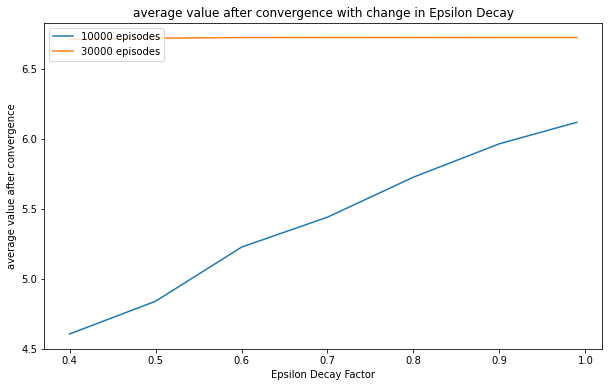

In [6]:
avg_v_list0 = []
for i in range(len(V_list0)):
    avg_v_list0.append(np.mean(V_list0[i]))

avg_v_list2 = []
for i in range(len(V_list1)):
    avg_v_list2.append(np.mean(V_list1[i]))
    
plt.figure(figsize=(10, 6)) 

plt.plot(epsilon_decay_list, avg_v_list0, label = "10000 episodes")
plt.plot(epsilon_decay_list, avg_v_list2, label = "30000 episodes")
plt.legend(loc="upper left")   
plt.title('average value after convergence with change in Epsilon Decay')
plt.xlabel('Epsilon Decay Factor')
plt.ylabel('average value after convergence')
plt.show()